## ОБЪЕДИНЕНИЕ АЛГОРИТМОВ В ЦЕПОЧКИ И КОНВЕЙЕРЫ

In [4]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np
import mglearn
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# загружаем и разбиваем данные
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, random_state=0)

# вычисляем минимум и максимум по обучающим данным
scaler = MinMaxScaler().fit(X_train)

# масштабируем обучающие данные
X_train_scaled = scaler.transform(X_train)

svm = SVC()
# строим SVM на масштабированных обучающих данных
svm.fit(X_train_scaled, y_train)
# масштабируем тестовые данные и оцениваем качество на
# масштабированных данных
X_test_scaled = scaler.transform(X_test)
print("Правильность на тестовом наборе: {:.2f}".format(
    svm.score(X_test_scaled, y_test)))

Правильность на тестовом наборе: 0.97


In [6]:
from sklearn.model_selection import GridSearchCV

# только в иллюстративных целях, не используйте этот код!
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=5)
grid.fit(X_train_scaled, y_train)
print("Наил знач правильности перекр проверки: {:.2f}". \
      format(grid.best_score_))
print("Наил знач правильности на тесте: {:.2f}".format(
    grid.score(X_test_scaled, y_test)))
print("Наил параметры: ", grid.best_params_)

Наил знач правильности перекр проверки: 0.98
Наил знач правильности на тесте: 0.97
Наил параметры:  {'C': 1, 'gamma': 1}


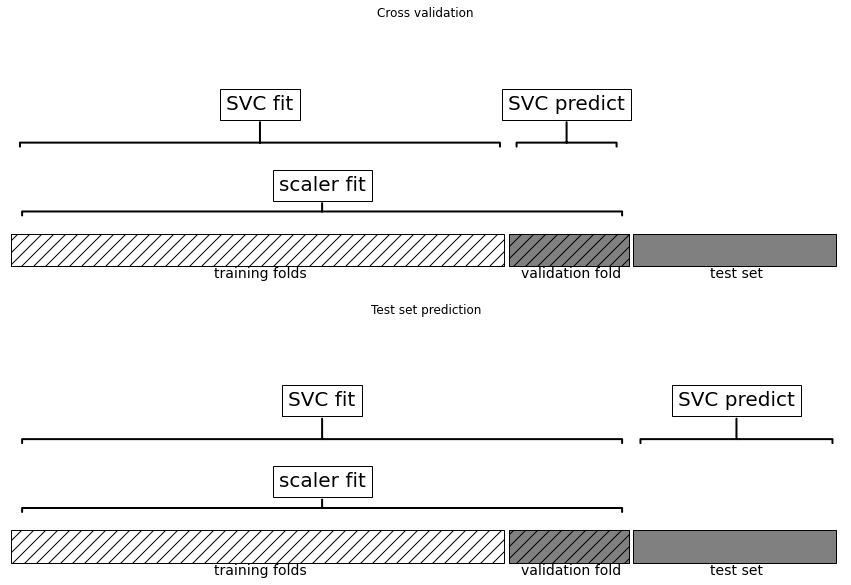

In [7]:
mglearn.plots.plot_improper_processing()